In [8]:
import os
import random
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [9]:
data_dir = "/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [10]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

print(f"Total images: {len(dataset)}")
print(f"Number of classes: {len(dataset.classes)}")
print(f"Classes: {dataset.classes}")

Total images: 1800
Number of classes: 17
Classes: ['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman', 'Jennifer Lawrence', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']


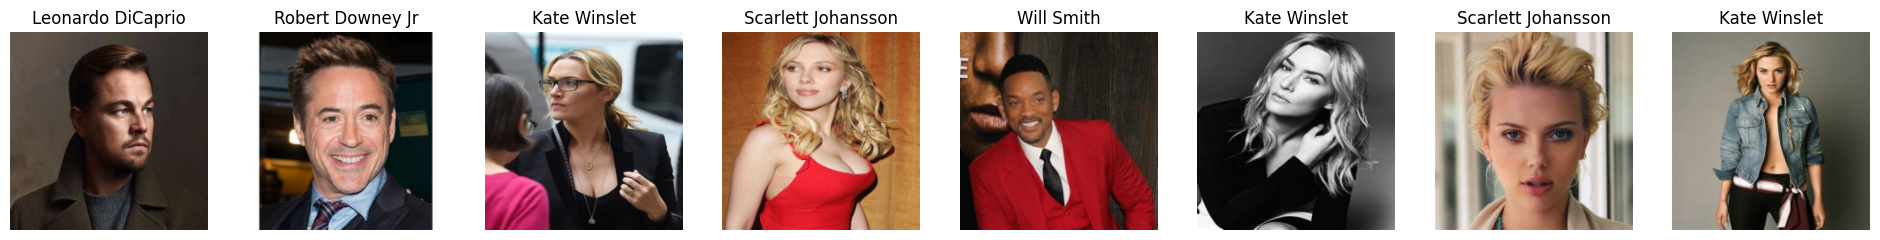

In [11]:
def show_random_images(dataset, n=8):
    fig, axes = plt.subplots(1, n, figsize=(24, 11))
    for i in range(n):
        img, label = random.choice(dataset)
        img = img.permute(1, 2, 0)  # C,H,W -> H,W,C
        axes[i].imshow(img)
        axes[i].set_title(dataset.classes[label])
        axes[i].axis("off")
    plt.show()

show_random_images(dataset)


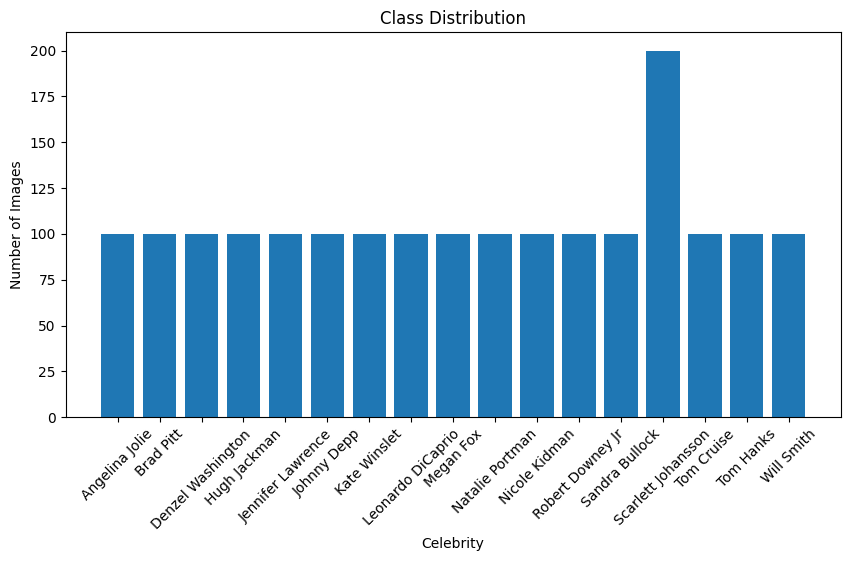

In [12]:
from collections import Counter

labels = [label for _, label in dataset]
label_counts = Counter(labels)

plt.figure(figsize=(10, 5))
plt.bar(dataset.classes, label_counts.values())
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.xlabel("Celebrity")
plt.ylabel("Number of Images")
plt.show()


In [13]:
import torch

loader = DataLoader(dataset, batch_size=32, shuffle=True)
imgs, _ = next(iter(loader))
print("Image batch shape:", imgs.shape)  # e.g. (32, 3, 224, 224)

# Mean and std per channel (useful for normalization)
mean = imgs.mean(dim=[0,2,3])
std = imgs.std(dim=[0,2,3])
print("Mean:", mean)
print("Std:", std)


Image batch shape: torch.Size([32, 3, 224, 224])
Mean: tensor([0.4730, 0.4086, 0.3856])
Std: tensor([0.3281, 0.3034, 0.2922])
